### Jorge Gerardo Iglesias Ortiz - A01653261
### Alejandro Hernández De la Torre - A01651516
### Santiago Orozco Quintero - A01658308
### Carlos Andres Barredeaz Rios - A01653183
### Jorge Yepez Frutos - A01652661

# Actividad Evaluable Patrones con K-means

## 1. Carga tus datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime
from datetime import date

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

df1 = pd.read_csv('analisis.csv')
df2 = pd.read_csv('avocado.csv')

print(df2)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

Se cargaron los datos de análisis y avocado

## 2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

In [2]:
df2[["year","Date"]]

,year,Date
0,2015,2015-12-27
1,2015,2015-12-20
2,2015,2015-12-13
3,2015,2015-12-06
4,2015,2015-11-29
...,...,...
18244,2018,2018-02-04
18245,2018,2018-01-28
18246,2018,2018-01-21
18247,2018,2018-01-14


In [3]:
def year_fraction(datef):
    start = date(datef.year, 1, 1).toordinal()
    year_length = date(datef.year+1, 1, 1).toordinal() - start
    return datef.year + float(datef.toordinal() - start) / year_length

def strtoyearf(v):
    for i in range(0, len(v)):
        v[i] = year_fraction(datetime. strptime(v[i], '%Y-%m-%d').date())
    return v

df2["Date"] = strtoyearf(list(df2["Date"]))

print(df2["Date"])

0        2015.986301
1        2015.967123
2        2015.947945
3        2015.928767
4        2015.909589
            ...     
18244    2018.093151
18245    2018.073973
18246    2018.054795
18247    2018.035616
18248    2018.016438
Name: Date, Length: 18249, dtype: float64


In [4]:
df2[["year","Date"]]

,year,Date
0,2015,2015.986301
1,2015,2015.967123
2,2015,2015.947945
3,2015,2015.928767
4,2015,2015.909589
...,...,...
18244,2018,2018.093151
18245,2018,2018.073973
18246,2018,2018.054795
18247,2018,2018.035616


Se podría decir que year era una de las variables que considerábamos quitar y que primero se utilizó para un análisis rápido para su k-means. Una vez que se convirtió la fecha en un valor de año con un decimal que representa los meses y días, la variable year se volvió irrelevante al ser menos preciso para lo que queríamos estudiar. Por lo tanto, las demás variables son relevantes debido a que ofrecen mucha información incluso si está en string. De estas variables decidimos usar como "y" el average price para saber cómo es que también las otras variables seleccionadas que serían los volúmenes, bolsas y fechas afectaban el precio.

## 3 y 4. Determina un valor de k. Utilizando scikitlearn calcula los centros del algoritmo k-means.

### Análisis.csv

In [5]:
X = np.array(df1[["op","ex","ag"]])
y = np.array(df1['categoria'])
X.shape

(140, 3)

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_68916/724161956.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


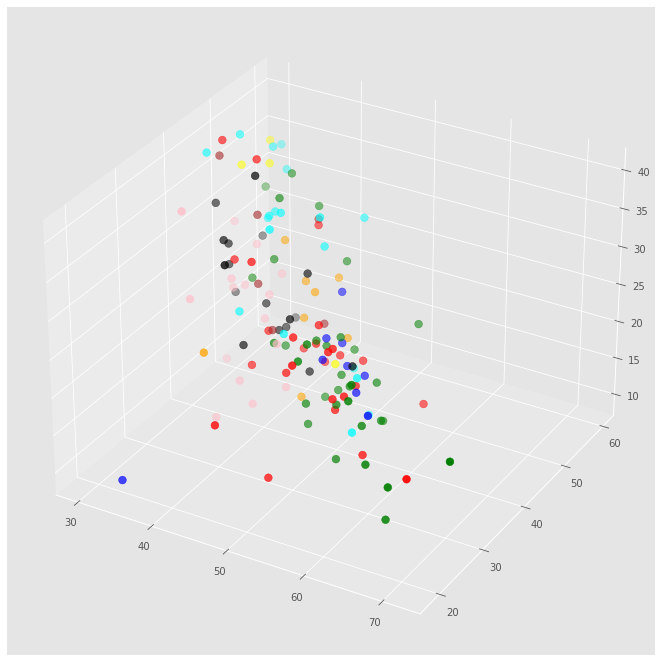

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[int(row)])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


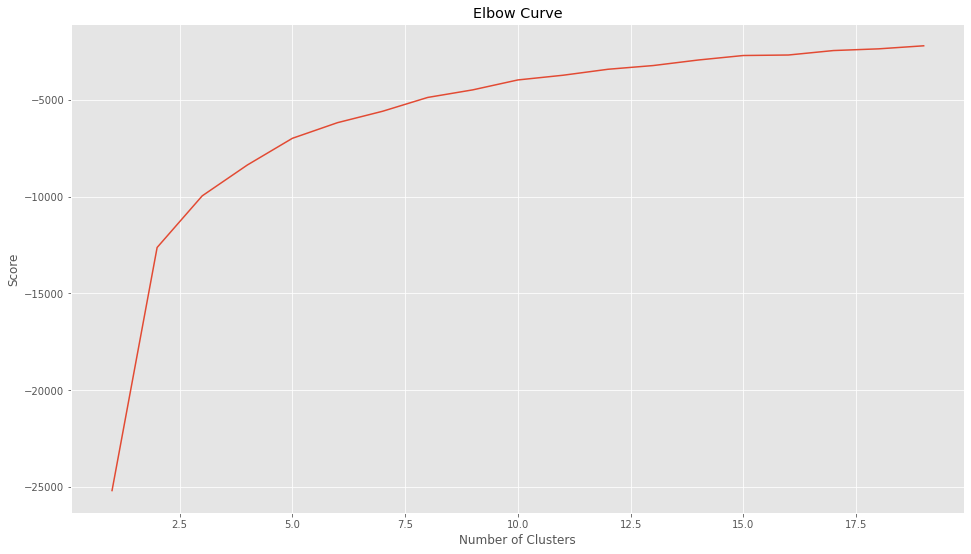

In [7]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[42.968253   32.53013537 20.93305995]
 [39.98518668 43.35386426 23.32930742]
 [35.90241306 47.56828232 33.58748762]
 [58.70462307 30.53566167 15.72207033]
 [50.26472539 40.722464   17.31345388]]


C:\Users\USUARIO\AppData\Local\Temp/ipykernel_68916/3420450788.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


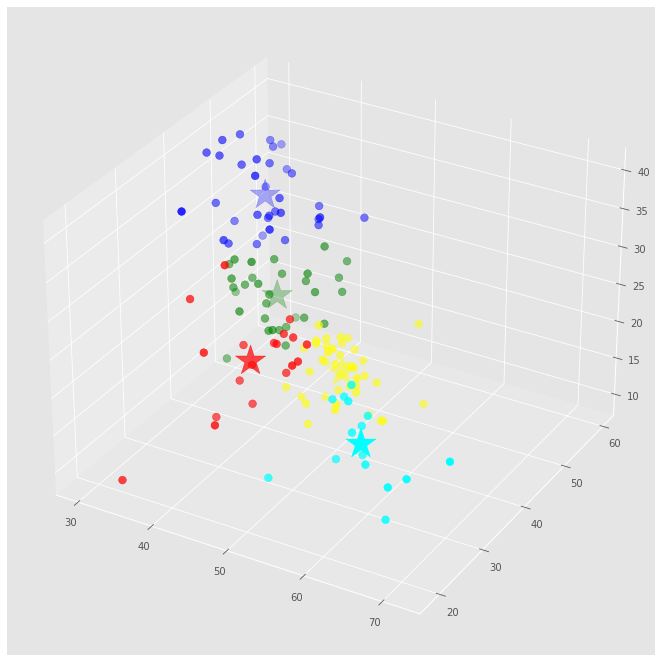

In [9]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

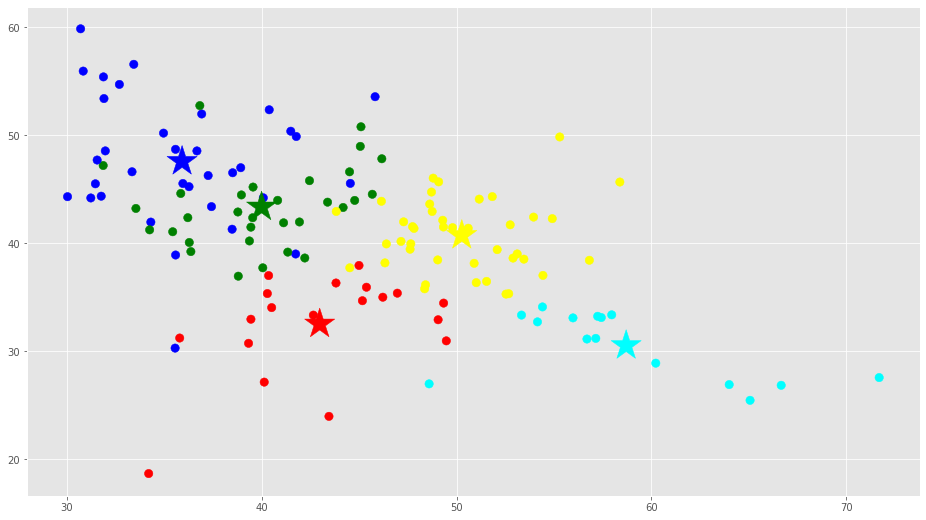

In [10]:
f1 = df1['op'].values
f2 = df1['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

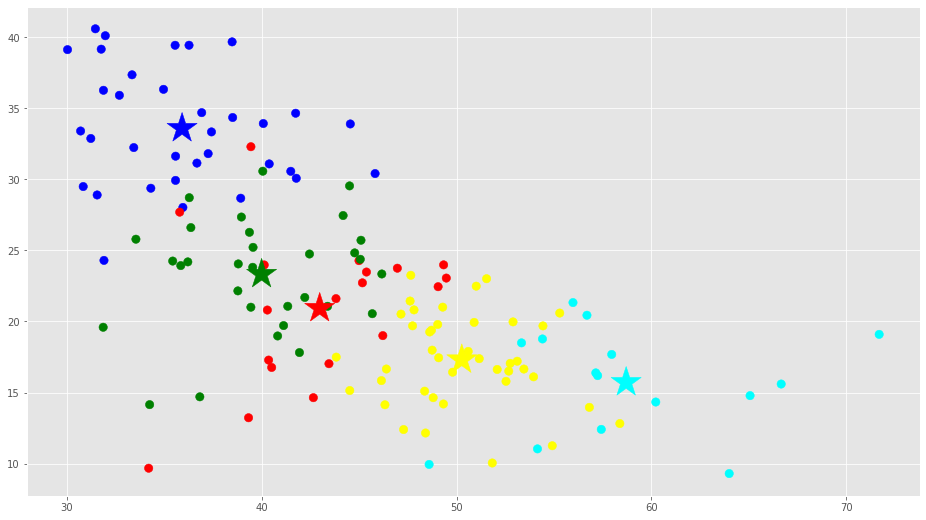

In [11]:
f1 = df1['op'].values
f2 = df1['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

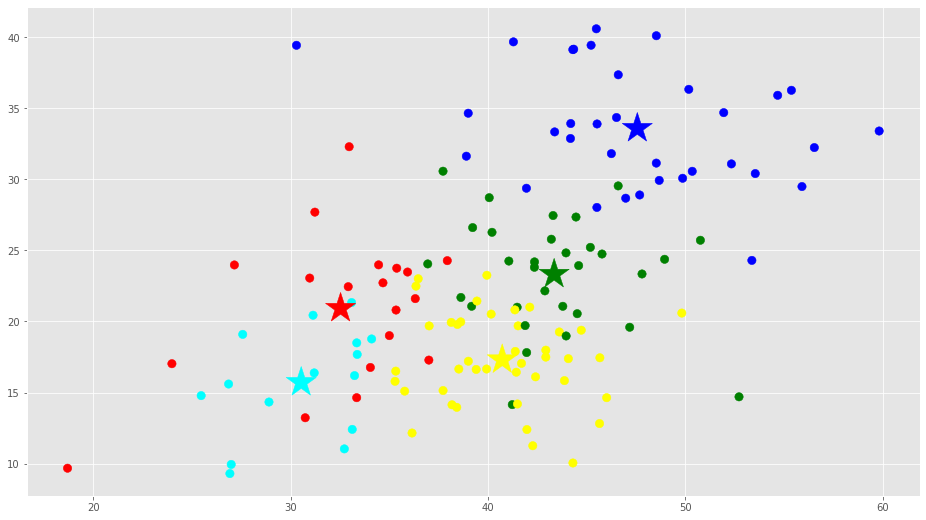

In [12]:
f1 = df1['ex'].values
f2 = df1['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [13]:
copy =  pd.DataFrame()
copy['usuario']=df1['usuario'].values
copy['categoria']=df1['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,31
2,blue,34
3,cyan,15
4,yellow,41


In [14]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,5.0
2,2,3.0
3,3,1.0
4,4,1.0
5,5,NaN
6,6,1.0
7,7,3.0
8,8,5.0
9,9,NaN


In [15]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([120,  64,  98,  82,  21], dtype=int64)

In [16]:
users=df1['usuario'].values
for row in closest:
    print(users[row])

SarahPalinUSA
ierrejon
maria_patino
JudgeJudy
carmenelectra


In [17]:
X_new = np.array([[45.92,57.74,15.66]])
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


### Avocado.csv

In [18]:
X = np.array(df2[["Total Volume","Total Bags","Date"]])
y = np.array(df2['AveragePrice'])
X.shape

(18249, 3)

In [19]:
min(list(np.array(df2['AveragePrice'])))
#print(max(list(np.array(df2['AveragePrice']))))

0.44

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_68916/1418096139.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


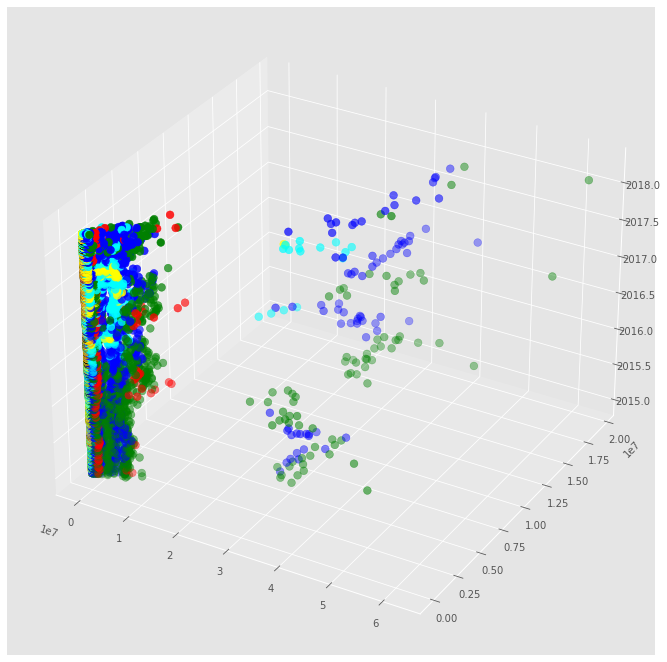

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
miny = min(list(np.array(df2['AveragePrice'])))
maxy = max(list(np.array(df2['AveragePrice'])))
for row in y:
    asignar.append(colores[int((float(row)-miny)*(11/maxy))])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
[-2.3539280575142688e+17, -3.726427607272731e+16, -1.4208643635568548e+16, -9993639818535162.0, -7145585257493560.0, -5728460110102767.0, -4398083504596836.0, -3658337251849516.0, -3119421520020281.0, -2712585722845884.0, -2397040183118823.0, -2082572428987569.2, -1878764355513267.0, -1717146489584155.8, -1574990776584126.5, -1457418852158134.2, -1336635851863444.0, -1246459266633527.8, -1142800994215630.8]


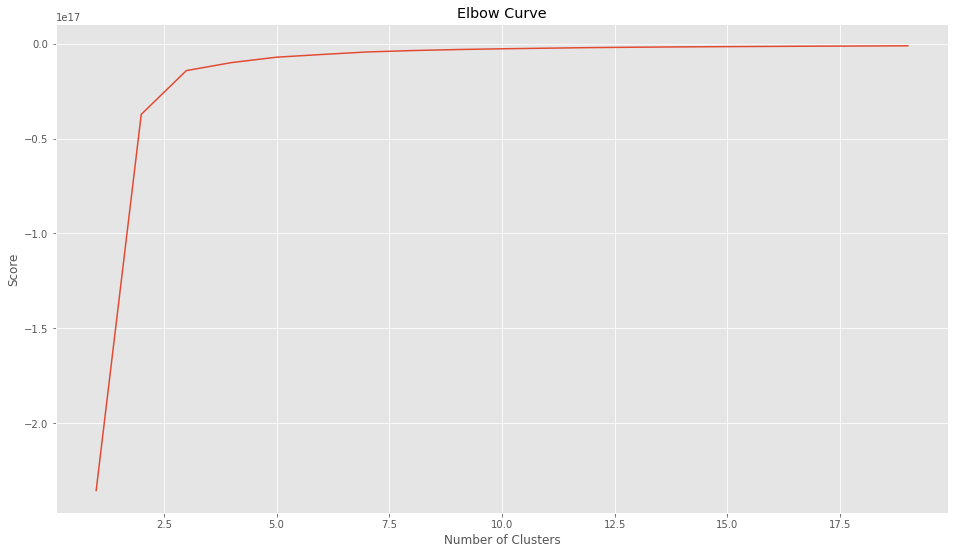

In [21]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.40087076e+05 7.20529553e+04 2.01661710e+03]
 [2.99660171e+07 7.45738526e+06 2.01640297e+03]
 [4.45007684e+06 1.23738713e+06 2.01662483e+03]
 [3.91973895e+07 1.17022427e+07 2.01692892e+03]]


C:\Users\USUARIO\AppData\Local\Temp/ipykernel_68916/2080621429.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


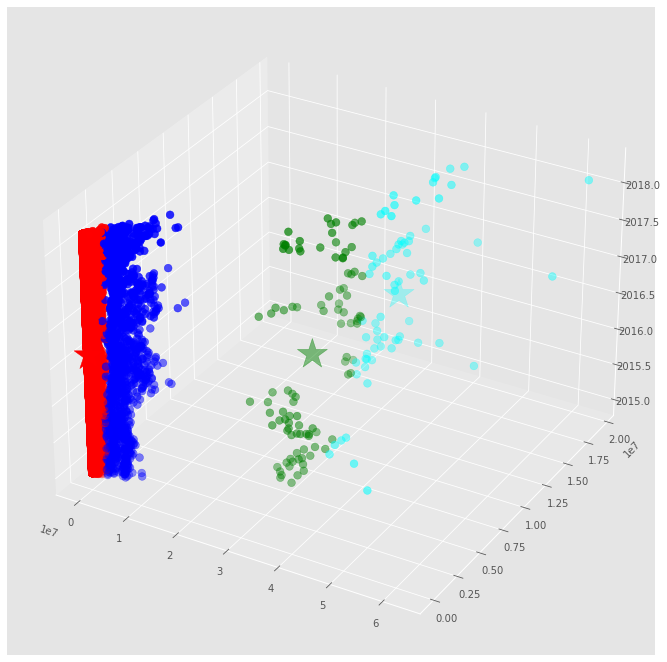

In [23]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

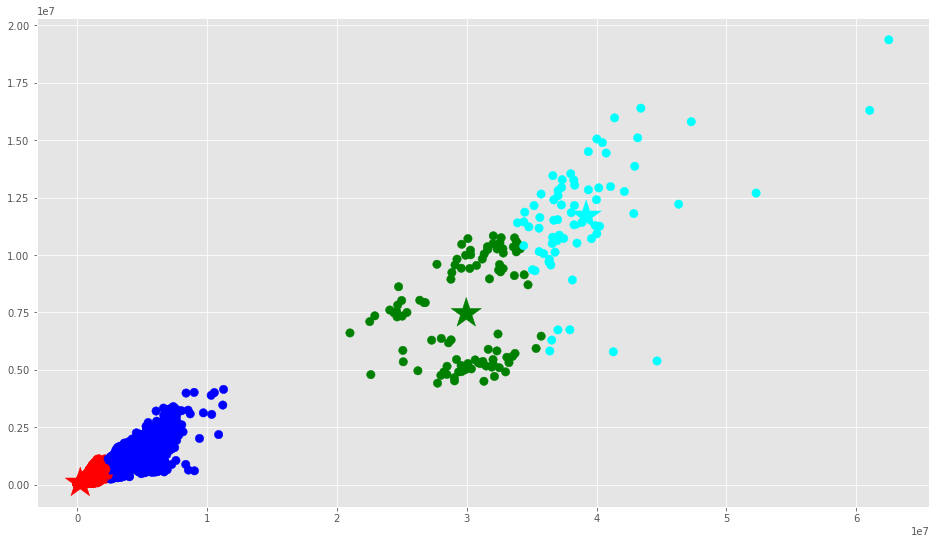

In [24]:
f1 = df2['Total Volume'].values
f2 = df2['Total Bags'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

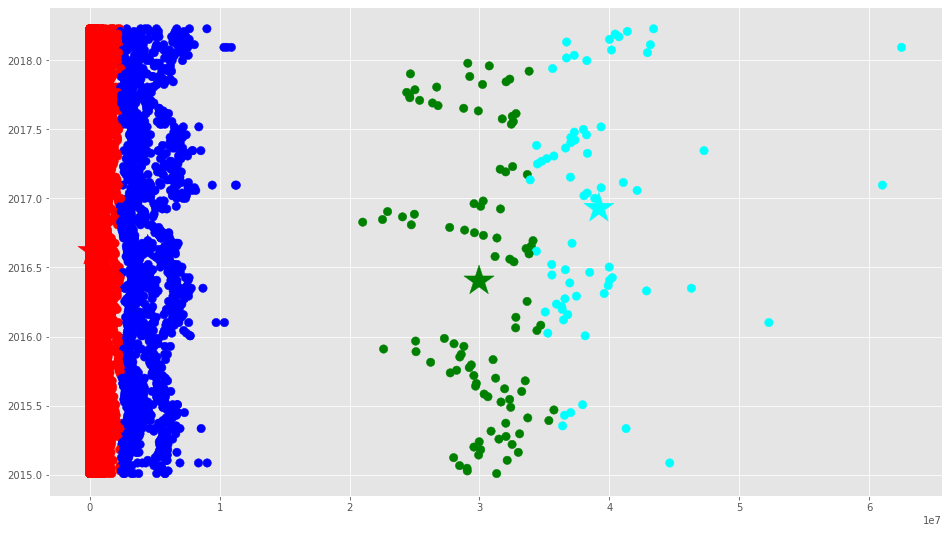

In [25]:
f1 = df2['Total Volume'].values
f2 = df2['Date'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

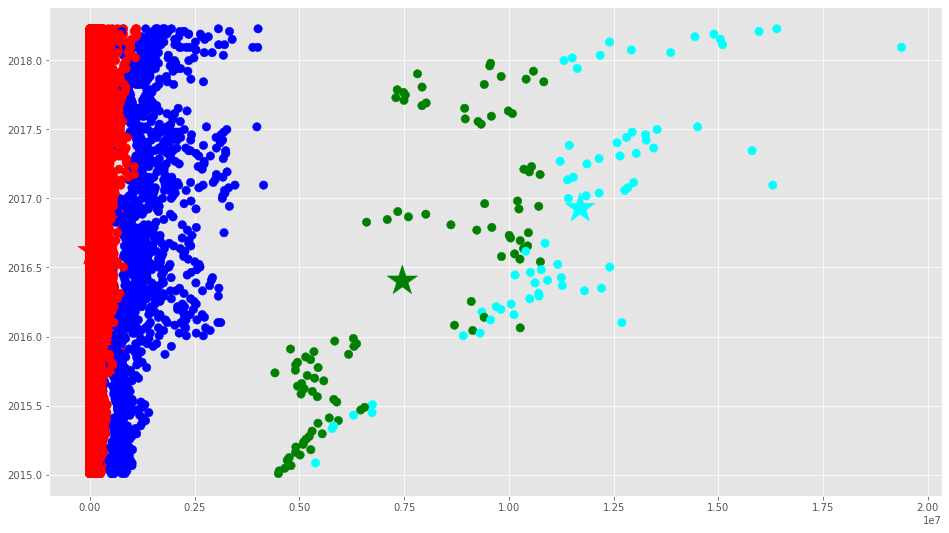

In [26]:
f1 = df2['Total Bags'].values
f2 = df2['Date'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [27]:
copy =  pd.DataFrame()
copy['region']=df2['region'].values
copy['AveragePrice']=df2['AveragePrice'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,16778
1,green,100
2,blue,1302
3,cyan,69


In [28]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['AveragePrice']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('AveragePrice').size()
diversidadGrupo

,AveragePrice,cantidad
0,0,NaN
1,1,143.0
2,2,59.0
3,3,2.0
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN


In [29]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([4190, 2655, 1532, 8371], dtype=int64)

In [30]:
users=df2['region'].values
for row in closest:
    print(users[row])

Nashville
TotalUS
Northeast
TotalUS


## Basado en los centros responde las siguientes preguntas:

* ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Si, porque de manera similar a como se hace con el diagrama de cajas nos muestra una tendencia en los datos para poder hacer inferencias sobre ellos basados en la proximidad con otro conjunto de valores.

* ¿Cómo obtuviste el valor de k a usar?

Como se vio anteriormente, utilizamos los comandos de Kmeans dentro de la librería de SciKitLearn con la cual devuelve los valores de la k a usar a partir de los parámetros dados. Para un entendimiento mejor se podrían observar los resultados obtenidos en los puntos 3 y 4. Por lo tanto, los valores para k que quedaron mejor fue el de 4 ya que permite identificar mejor como es que se agrupan los datos.

* ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

No debido a que los grupos de valores que se encontraron no eran tan numerosos de modo que si implementamos una k más grande los grupos serían tan numerosos que la información proporcionada por observar la distribución de estos mismos no sería significativa.

* ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

In [31]:
def distancia3d(p1, p2):
    l = pow((p2[0]-p1[0])**2+(p2[1]-p1[1])**2+(p2[2]-p1[2])**2,0.5)
    return l

centroidsl = centroids.tolist()
for i in range(3):
    for j in range(i+1,4):
        print(f'Punto {i+1} y Punto {j+1}')
        print(distancia3d(centroidsl[i],centroidsl[j]))

Punto 1 y Punto 2
30629627.015298247
Punto 1 y Punto 3
4368296.874265416
Punto 1 y Punto 4
40656275.328280516
Punto 2 y Punto 3
26263122.16137359
Punto 2 y Punto 4
10160563.469187958
Punto 3 y Punto 4
36288964.39825231


De lo que se puede observar, es que los centroides siendo punto 3 y 4 son los más cercanos entre sí, mientras que los centroides siendo los puntos 1 y 2 son los más lejanos. Por lo tanto, de nuestros análisis se observa que TotalUS tiene dos centros que coincidentemente son los más cercanos unos a otros por lo que tiene sentido.

* ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Estarían muy despegados unos de otros abarcando un rango de valores muy amplios por lo que no podríamos tener información importante sobre el comportamiento de los datos por la amplitud del intervalo de valores.

* ¿Qué puedes decir de los datos basándose en los centros?

Los centros nos indican la tendencia de relación que tienen unos valores con otros por lo que al verlos podemos saber qué tan parecidos entre sí son los valores que se encuentran próximos a dicho centro, en el caso particular de los datos que graficamos podemos denotar cual es la relación que hubo entre la cantidad de volumen, la cantidad de costales y la fecha con las cuales agrupamos distintos valores para el precio promedio del aguacate y en cada centro quien es el que denota más o el que estaba mas cerca en esa producción.